In [1]:
#Basic libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

! pip install category_encoders
import category_encoders as ce

#Sampling methods
from sklearn.model_selection import train_test_split

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

#Model evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn import metrics
import scipy.stats as stats
from scipy.stats import skew

# For deep learning
import tensorflow as tf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00


## Importing Train and Test Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv("/content/drive/MyDrive/ML_CCT_datasets/fraudTrainSampled.csv", index_col=0)
X_train = train.loc[:, train.columns != "is_fraud"]
y_train = train["is_fraud"]

In [4]:
test = pd.read_csv("/content/drive/MyDrive/ML_CCT_datasets/fraudTestSampled.csv", index_col=0)
X_test = test.loc[:, test.columns != "is_fraud"]
y_test = test["is_fraud"]

## Machine Learning Models

In [5]:
def evaluate_model(target, predicted, y_score, normalize_matrix= None):
    accuracy = metrics.accuracy_score(target, predicted)
    precision = metrics.precision_score(target, predicted)
    recall = metrics.recall_score(target, predicted)
    f1 = f1_score(target, predicted)
    auc = metrics.roc_auc_score(target, y_score)

    confusion_matrix = metrics.confusion_matrix(
        target, predicted, normalize=normalize_matrix)
    cm_display = metrics.ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix, display_labels=[False, True])
    cm_display.plot()
    plt.grid(False)
    plt.show()

    fpr, tpr, threshold = roc_curve(target, y_score)
    plt.plot(fpr, tpr, label="Model", c="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", c="yellow")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

    print("Accuracy", accuracy.round(2))
    print("Precision:", precision.round(2))
    print("Recall:", recall.round(2))
    print("F1 Score", f1.round(2))
    print("AUC:", auc)
    return None

In [6]:
rf = RandomForestClassifier(random_state=23)
knn = KNeighborsClassifier()
gboost = GradientBoostingClassifier(random_state=23)
lgbm = LGBMClassifier(random_state=23)

### Random Forest
An ensemble learning method that combines multiple decision trees to improve prediction accuracy and control overfitting. It uses bagging and feature randomness in constructing individual trees, leading to a robust, versatile model.

In [7]:
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_score_train = rf.predict_proba(X_train)[:,1]

y_pred_test = rf.predict(X_test)
y_score_test = rf.predict_proba(X_test)[:,1]

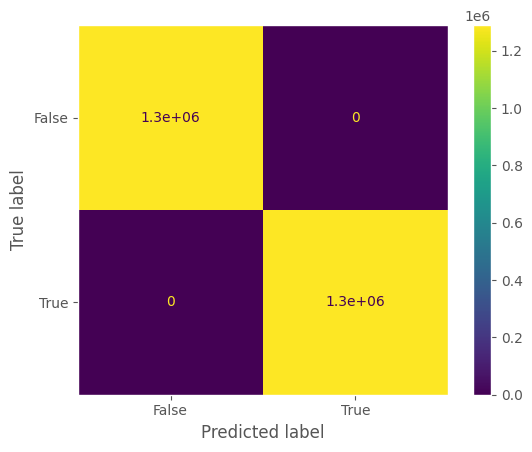

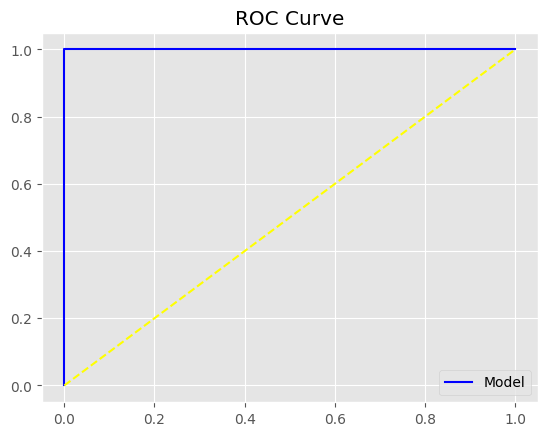

Accuracy 1.0
Precision: 1.0
Recall: 1.0
F1 Score 1.0
AUC: 1.0


In [8]:
#training metrics
evaluate_model(y_train, y_pred_train, y_score_train)

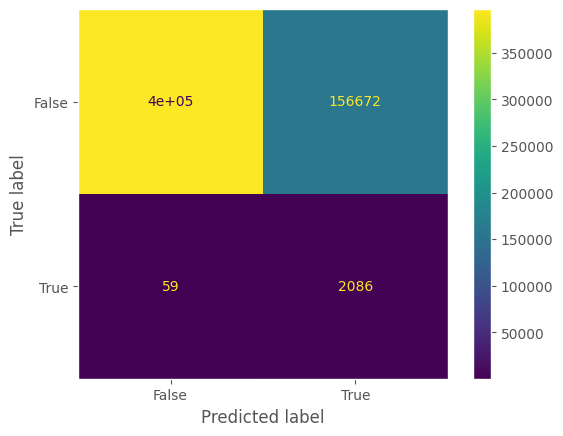

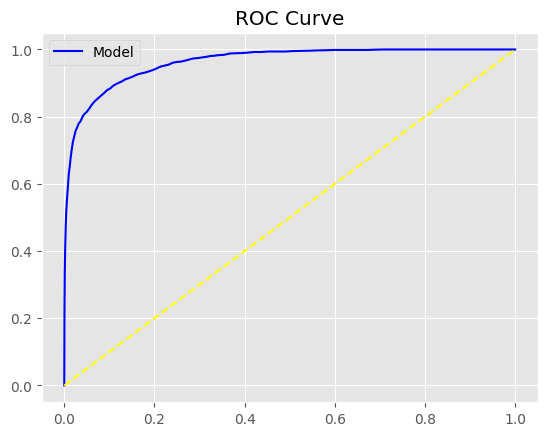

Accuracy 0.72
Precision: 0.01
Recall: 0.97
F1 Score 0.03
AUC: 0.9628438643625412


In [9]:
#test metrics
evaluate_model(y_test, y_pred_test, y_score_test)

### K Nearest Neighbours
A simple, non-parametric algorithm that predicts a data point's classification based on the most frequent class among its 'k' nearest neighbors. It's intuitive and works well for basic classification tasks.

In [1]:
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_score_train = knn.predict_proba(X_train)[:,1]

y_pred_test = knn.predict(X_test)
y_score_test = knn.predict_proba(X_test)[:,1]

NameError: name 'knn' is not defined

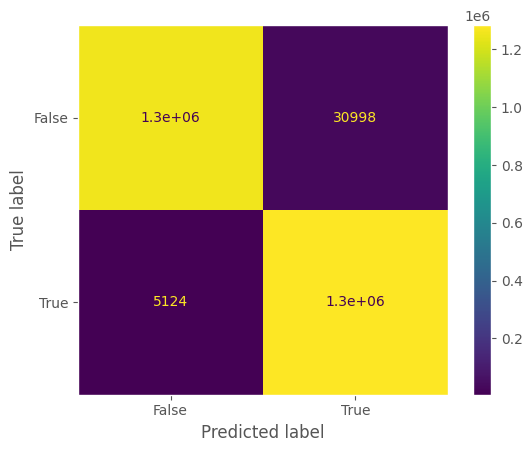

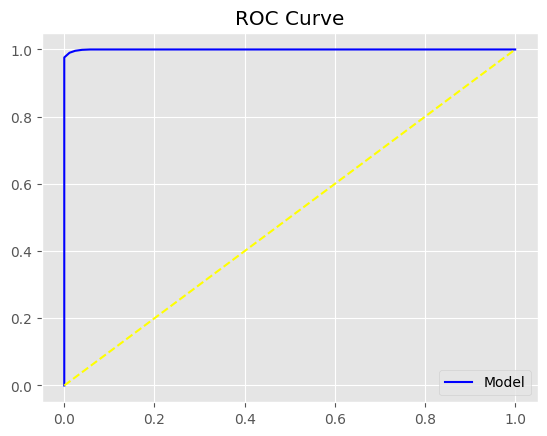

Accuracy 0.99
Precision: 0.98
Recall: 1.0
F1 Score 0.99
AUC: 0.9996722367649299


In [11]:
#training metrics
evaluate_model(y_train, y_pred_train, y_score_train)

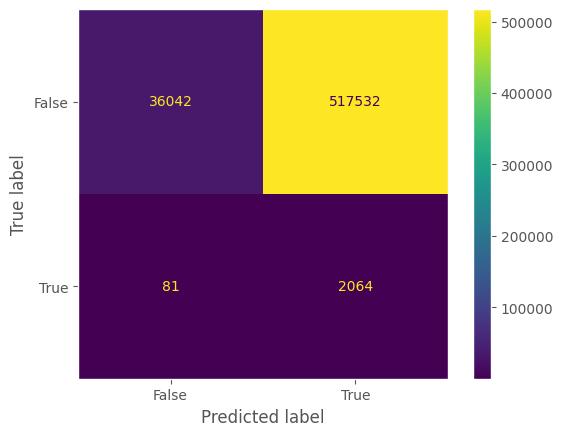

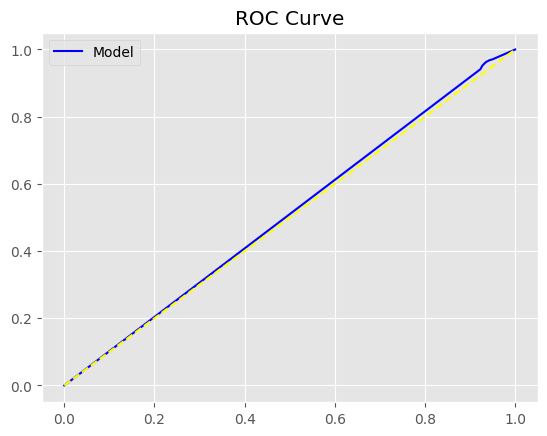

Accuracy 0.07
Precision: 0.0
Recall: 0.96
F1 Score 0.01
AUC: 0.5096387094186846


In [12]:
#test metrics
evaluate_model(y_test, y_pred_test, y_score_test)

### Gradient Boosting
A powerful ensemble technique that builds sequential models, typically decision trees, each correcting the errors of its predecessor, leading to strong predictive performance, especially in structured data scenarios.

In [13]:
gboost.fit(X_train, y_train)

y_pred_train = gboost.predict(X_train)
y_score_train = gboost.predict_proba(X_train)[:,1]

y_pred_test = gboost.predict(X_test)
y_score_test = gboost.predict_proba(X_test)[:,1]

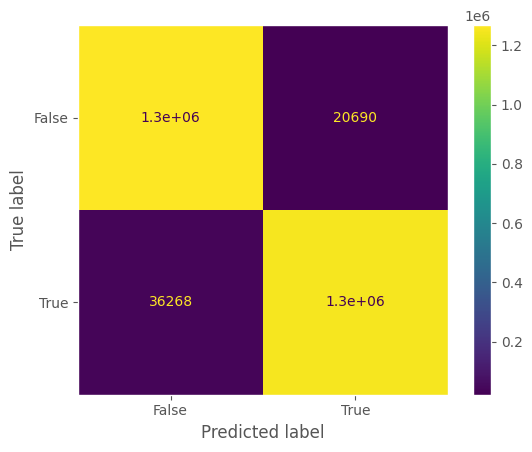

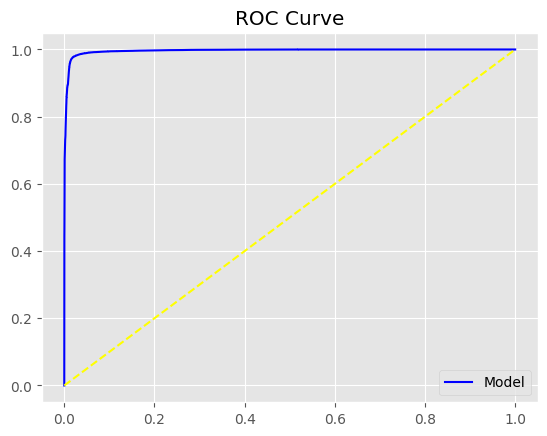

Accuracy 0.98
Precision: 0.98
Recall: 0.97
F1 Score 0.98
AUC: 0.9962055982111765


In [14]:
#training metrics
evaluate_model(y_train, y_pred_train, y_score_train)

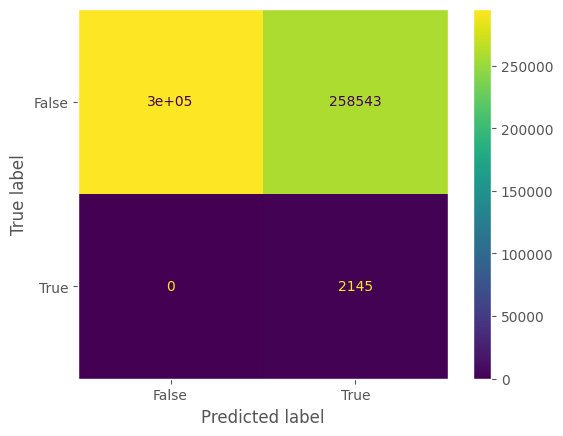

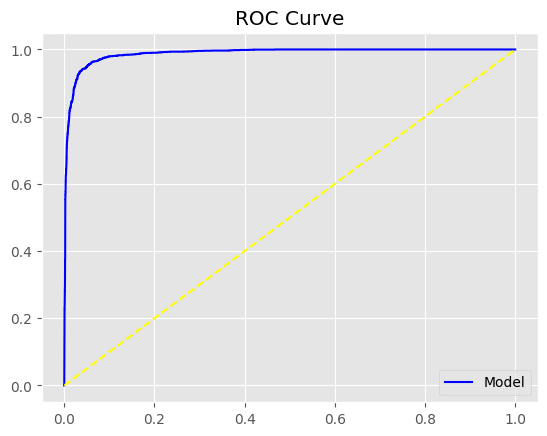

Accuracy 0.53
Precision: 0.01
Recall: 1.0
F1 Score 0.02
AUC: 0.9880116743056476


In [15]:
#test metrics
evaluate_model(y_test, y_pred_test, y_score_test)

### Light GBM
A fast, distributed, high-performance gradient boosting framework based on decision tree algorithms, used for ranking, classification, and many other machine learning tasks. It's known for handling large datasets efficiently.

In [16]:
lgbm.fit(X_train, y_train)

y_pred_train = lgbm.predict(X_train)
y_score_train = lgbm.predict_proba(X_train)[:,1]

y_pred_test = lgbm.predict(X_test)
y_score_test = lgbm.predict_proba(X_test)[:,1]

[LightGBM] [Info] Number of positive: 1289169, number of negative: 1289169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.217807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1625
[LightGBM] [Info] Number of data points in the train set: 2578338, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


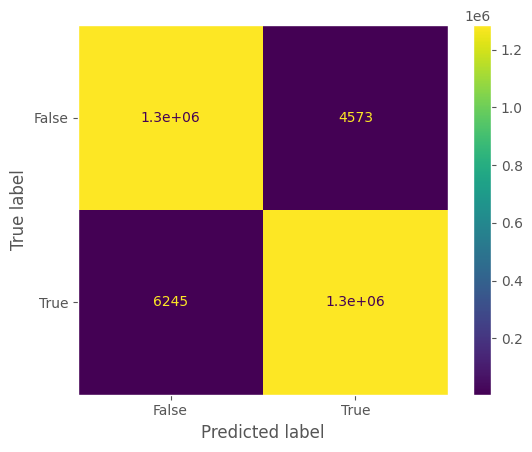

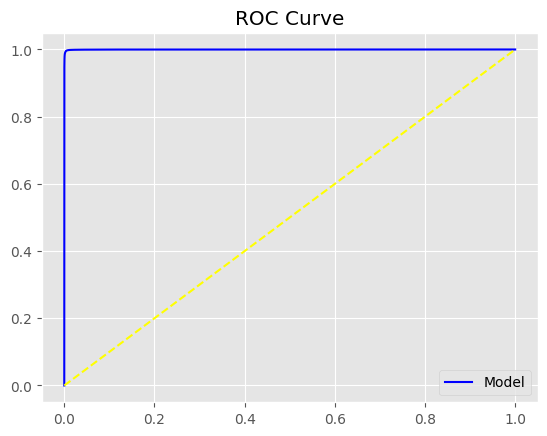

Accuracy 1.0
Precision: 1.0
Recall: 1.0
F1 Score 1.0
AUC: 0.9998246575054281


In [17]:
#training metrics
evaluate_model(y_train, y_pred_train, y_score_train)

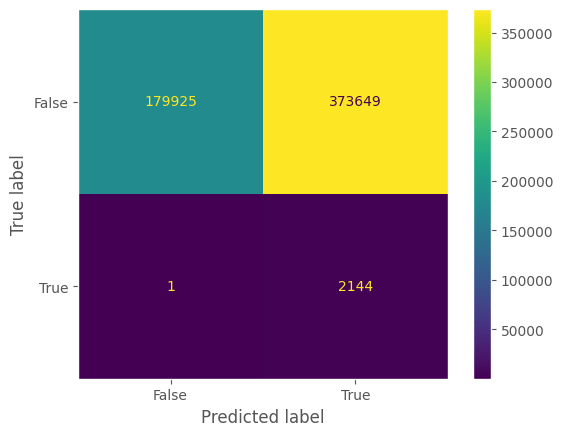

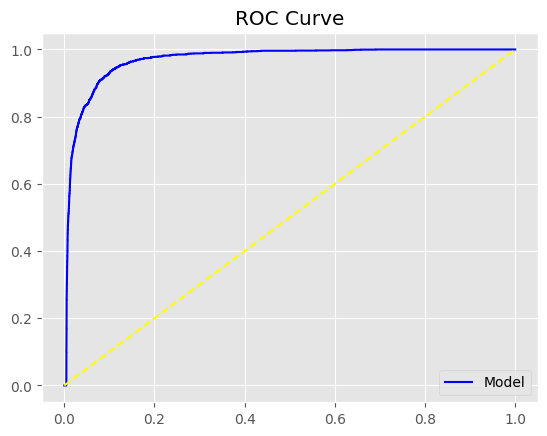

Accuracy 0.33
Precision: 0.01
Recall: 1.0
F1 Score 0.01
AUC: 0.9694631578347215


In [18]:
#test metrics
evaluate_model(y_test, y_pred_test, y_score_test)

## Deep Learning Models

In [5]:
def plot_loss(history, title="Model Loss"):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

### Simple Neural Network
A foundational neural network structure typically comprising input, hidden, and output layers. It uses interconnected nodes or neurons to process data, suitable for basic tasks like classification and regression.

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
64459/64459 [==============================] - 185s 3ms/step - loss: 0.4797 - accuracy: 0.8419 - val_loss: 0.7461 - val_accuracy: 0.6745
Epoch 2/10
64459/64459 [==============================] - 172s 3ms/step - loss: 0.3113 - accuracy: 0.8705 - val_loss: 0.4329 - val_accuracy: 0.8016
Epoch 3/10
64459/64459 [==============================] - 195s 3ms/step - loss: 0.2995 - accuracy: 0.8758 - val_loss: 0.4688 - val_accuracy: 0.7877
Epoch 4/10
64459/64459 [==============================] - 189s 3ms/step - loss: 0.2830 - accuracy: 0.8828 - val_loss: 0.4906 - val_accuracy: 0.7689
Epoch 5/10
64459/64459 [==============================] - 169s 3ms/step - loss: 0.2197 - accuracy: 0.9100 - val_loss: 0.2576 - val_accuracy: 0.8760
Epoch 6/10
64459/64459 [==============================] - 191s 3ms/step - loss: 0.1965 - accuracy: 0.9202 - val_loss: 0.1904 - val_accuracy: 0.9107
Epoch 7/10
64459/64459 [==============================] - 192s 3ms/step - loss: 0.1879 - accuracy: 0.9243 - val_

In [21]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

17367/17367 [==============================] - 33s 2ms/step - loss: 0.4468 - accuracy: 0.9201
Accuracy: 0.9201251268386841


In [22]:
# Classification Report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions.round()))

17367/17367 [==============================] - 28s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    553574
           1       0.04      0.95      0.08      2145

    accuracy                           0.92    555719
   macro avg       0.52      0.93      0.52    555719
weighted avg       1.00      0.92      0.95    555719



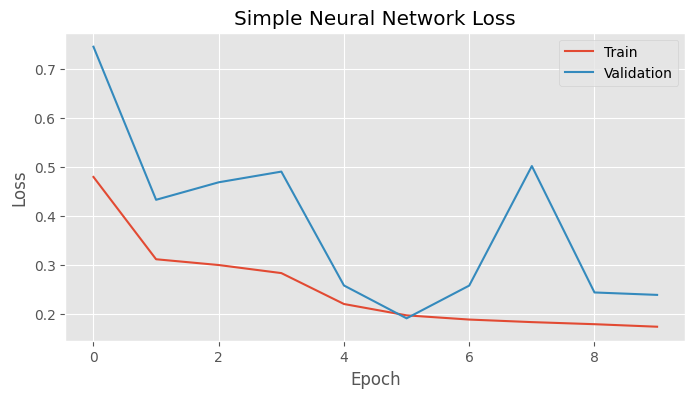

In [23]:
# Plotting the loss
plot_loss(history, title="Simple Neural Network Loss")

### Convolutional Neural Network (CNN)
A deep learning algorithm specializing in processing structured grid data like images. It employs convolutional layers to automatically and adaptively learn spatial hierarchies of features, ideal for image recognition and processing tasks.

In [24]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
64459/64459 [==============================] - 242s 4ms/step - loss: 0.2088 - accuracy: 0.9197 - val_loss: 0.2342 - val_accuracy: 0.8957
Epoch 2/10
64459/64459 [==============================] - 235s 4ms/step - loss: 0.1252 - accuracy: 0.9522 - val_loss: 0.1502 - val_accuracy: 0.9344
Epoch 3/10
64459/64459 [==============================] - 221s 3ms/step - loss: 0.1083 - accuracy: 0.9593 - val_loss: 0.1866 - val_accuracy: 0.9207
Epoch 4/10
64459/64459 [==============================] - 222s 3ms/step - loss: 0.1012 - accuracy: 0.9622 - val_loss: 0.1544 - val_accuracy: 0.9317
Epoch 5/10
64459/64459 [==============================] - 232s 4ms/step - loss: 0.0976 - accuracy: 0.9637 - val_loss: 0.1614 - val_accuracy: 0.9301
Epoch 6/10
64459/64459 [==============================] - 218s 3ms/step - loss: 0.0948 - accuracy: 0.9648 - val_loss: 0.1451 - val_accuracy: 0.9401
Epoch 7/10
64459/64459 [==============================] - 231s 4ms/step - loss: 0.0928 - accuracy: 0.9655 - val_

In [25]:
# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")


17367/17367 [==============================] - 37s 2ms/step - loss: 0.8607 - accuracy: 0.8404
Accuracy: 0.8403797745704651


In [26]:
# Classification Report
predictions = cnn_model.predict(X_test)
print(classification_report(y_test, predictions.round()))

17367/17367 [==============================] - 35s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    553574
           1       0.02      0.97      0.04      2145

    accuracy                           0.84    555719
   macro avg       0.51      0.91      0.48    555719
weighted avg       1.00      0.84      0.91    555719



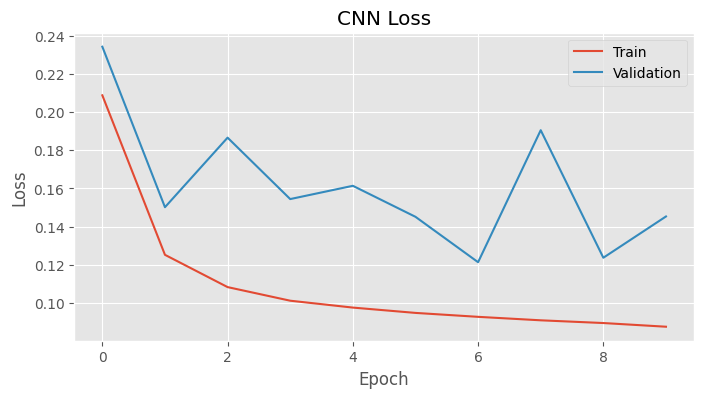

In [27]:
# Plotting the loss for CNN
plot_loss(cnn_history, title="CNN Loss")

### Recurrent Neural Network (RNN)
A type of neural network designed for sequential data processing, like time series or language. RNNs have connections that form directed cycles, allowing them to use information from previous steps, making them effective for tasks like language modeling and speech recognition.









In [6]:
rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
64459/64459 [==============================] - 850s 13ms/step - loss: 0.1300 - accuracy: 0.9493 - val_loss: 0.1191 - val_accuracy: 0.9529
Epoch 2/10
64459/64459 [==============================] - 799s 12ms/step - loss: 0.0685 - accuracy: 0.9757 - val_loss: 0.0887 - val_accuracy: 0.9649
Epoch 3/10
64459/64459 [==============================] - 799s 12ms/step - loss: 0.0579 - accuracy: 0.9796 - val_loss: 0.0865 - val_accuracy: 0.9657
Epoch 4/10
64459/64459 [==============================] - 824s 13ms/step - loss: 0.0523 - accuracy: 0.9816 - val_loss: 0.0624 - val_accuracy: 0.9744
Epoch 5/10
64459/64459 [==============================] - 802s 12ms/step - loss: 0.0493 - accuracy: 0.9828 - val_loss: 0.0721 - val_accuracy: 0.9729
Epoch 6/10
64459/64459 [==============================] - 793s 12ms/step - loss: 0.0457 - accuracy: 0.9841 - val_loss: 0.0868 - val_accuracy: 0.9687
Epoch 7/10
64459/64459 [==============================] - 817s 13ms/step - loss: 0.0437 - accuracy: 0.9849

In [7]:
# Evaluate the model
loss, accuracy = rnn_model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")


17367/17367 [==============================] - 75s 4ms/step - loss: 2.0093 - accuracy: 0.6343
Accuracy: 0.6343097686767578


In [8]:
# Classification Report
predictions = rnn_model.predict(X_test)
print(classification_report(y_test, predictions.round()))

17367/17367 [==============================] - 72s 4ms/step
              precision    recall  f1-score   support

           0       1.00      0.63      0.78    553574
           1       0.01      0.99      0.02      2145

    accuracy                           0.63    555719
   macro avg       0.51      0.81      0.40    555719
weighted avg       1.00      0.63      0.77    555719



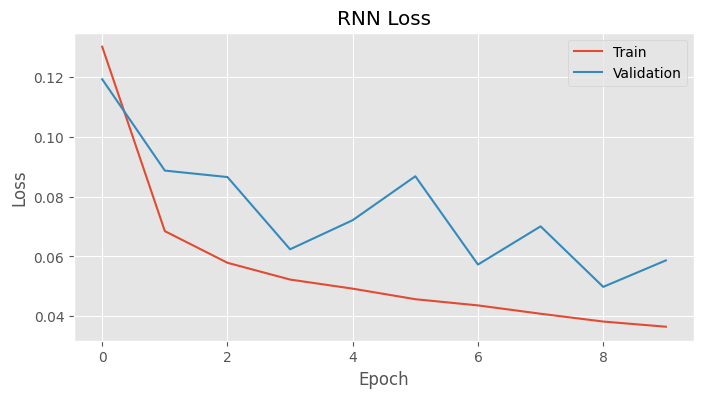

In [9]:
# Plotting the loss for RNN
plot_loss(rnn_history, title="RNN Loss")